In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
import matplotlib.pyplot as plt

# Increase the figure size

sns.set(rc={'figure.figsize':(15,20)})
sns.set_context("poster", font_scale = 2)
sns.set_style("white")


# Increase the line width
plt.rcParams['lines.linewidth'] = 1.5

# Increase the marker size
plt.rcParams['lines.markersize'] = 12

# Increase the size of tick labels
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40

# Increase the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Use a white background with black grid lines
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['grid.color'] = 'black'


# Use a serif font for better readability
plt.rcParams['font.family'] = 'arial'

# Set the output file format and resolution for saving the figure
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf'

<Figure size 1500x2000 with 0 Axes>

## Growth chart for multiple colonies on the plate experiment

In [9]:
# get data

dftobbexp = pd.read_csv('multi_experiment.csv', delimiter=';')
dftobbexp.head(5)

#7.3 pixels correspond to 1 mm
dftobbexp['Area_mm2'] = dftobbexp['Area'] / 7.3/7.3

#get and format simulation data

dftobbsim = pd.read_csv('multi_simul.csv')

dftobbsim.head()
headers = list(dftobbsim.columns)

headers.pop(0)
dftobbsimjav = dftobbsim.melt(id_vars='Hour', value_vars =headers, var_name ='Plate', value_name ='Area')
dftobbsimjav['Days'] = dftobbsimjav['Hour'] / 24
dftobbsimjav['Colonies on the plate'] = dftobbsimjav['Plate'].astype(str).str[0]
dftobbsimjav.sort_values(by=['Colonies on the plate'], inplace=True, ascending= True )
dftobbsimjav['Area']=dftobbsimjav['Area']/55.6
dftobbsimjav.head()


,Hour,Plate,Area,Days,Colonies on the plate
7695,480,1a,773.471223,20.000000,1
7366,151,1a,165.845324,6.291667,1
7367,152,1a,167.176259,6.333333,1
7368,153,1a,168.507194,6.375000,1
7369,154,1a,169.694245,6.416667,1


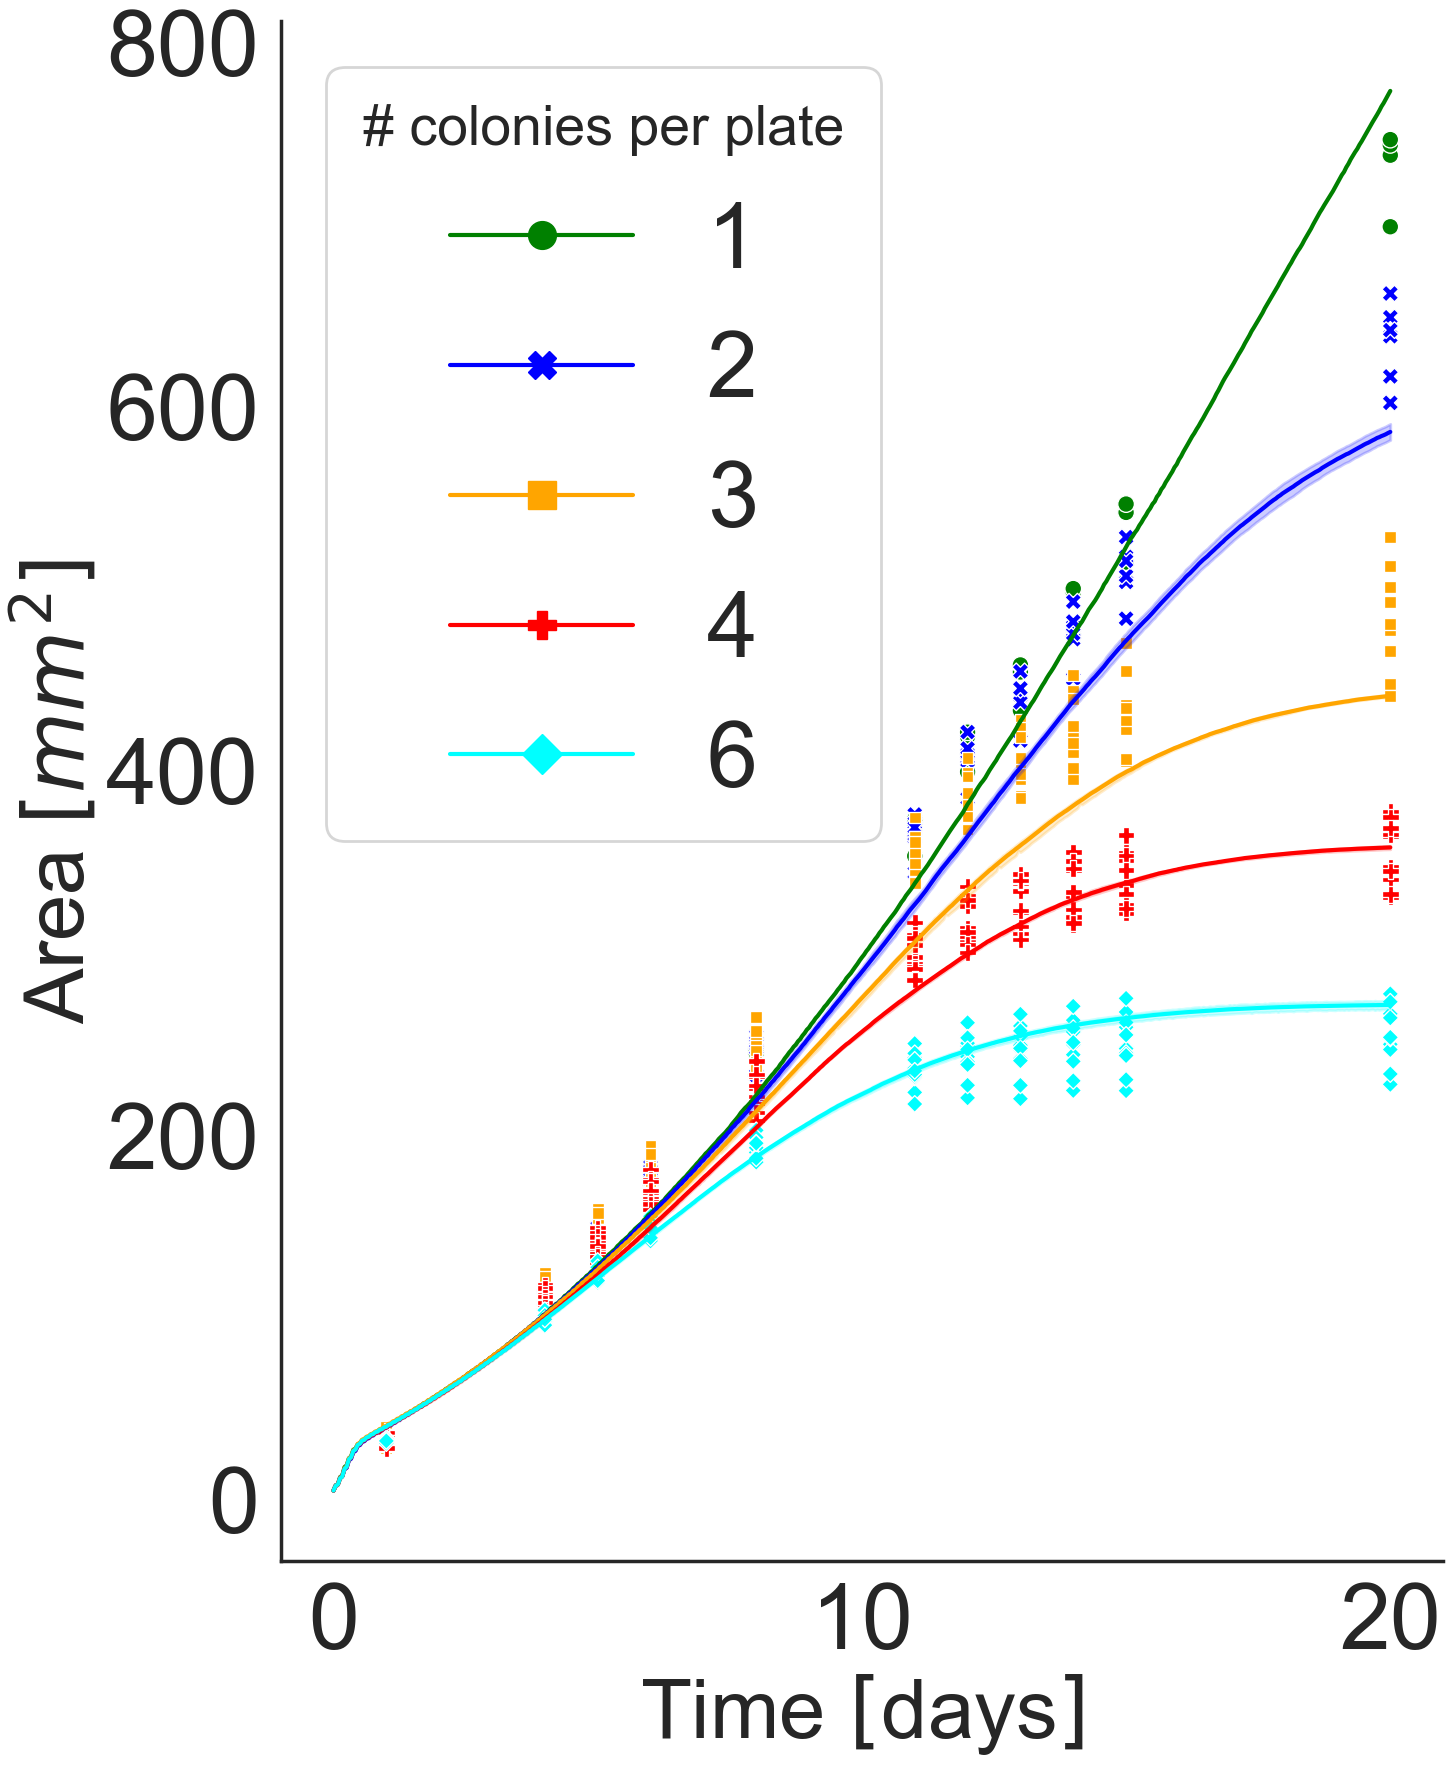

In [10]:
# initializes figure and plots


sns.set_context("poster", font_scale = 3)

sns.set_style('white')
colors=['green', 'blue','orange', 'red',  'cyan']
sns.set_palette(colors)



figt, axt = plt.subplots() 


# plot growth curve


sns.scatterplot(
    data=dftobbexp,
    x="Days", y="Area_mm2", 
    hue="Colonies on the plate",style="Colonies on the plate",  ax=axt , legend = None, palette = colors)

plt.xlabel('Time $[$days$]$',  fontsize=60)
plt.ylabel('Area $[mm^2]$',  fontsize=60)
 # applies twinx to axt, which is the second y axis. 


sns.lineplot(data=dftobbsimjav, x='Days', y='Area', hue="Colonies on the plate",  ax=axt, legend = None, palette = colors)

categories = dftobbsimjav['Colonies on the plate'].unique()
legend_labels = [1,2,3,4,6]
legend_handles = [
    plt.Line2D([0], [0], marker='o', color=colors[0], linestyle='-', label=legend_labels[0], markerfacecolor=colors[0], markersize=20),
    plt.Line2D([0], [0], marker='X', color=colors[1], linestyle='-', label=legend_labels[1], markerfacecolor=colors[1], markersize=20),
    plt.Line2D([0], [0], marker='s', color=colors[2], linestyle='-', label=legend_labels[2], markerfacecolor=colors[2], markersize=20),
    plt.Line2D([0], [0], marker='P', color=colors[3], linestyle='-', label=legend_labels[3], markerfacecolor=colors[3], markersize=20),
    plt.Line2D([0], [0], marker='D', color=colors[4], linestyle='-', label=legend_labels[4], markerfacecolor=colors[4], markersize=20)
]

plt.legend(handles=legend_handles, labels=legend_labels, title='# colonies per plate', loc='upper left', title_fontsize=40)

sns.despine()
plt.savefig('multidropchart.svg',  format = 'svg', dpi=300)

<Figure size 4500x6000 with 0 Axes>